In [35]:
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))

In [5]:
suppressMessages(library(repr))
options(repr.plot.width=25,
        repr.plot.height=15,
        #repr.plot.pointsize=50,
        repr.plot.family='serif'
       )

In [6]:
setwd("~/Repositories/AirQualityCOVID/")
source("src/functions.R")

In [78]:
data.df <- merge(read.csv("data/Results/predictions_municipios.csv"),
                 read.csv("data/Clustering/groups.csv"),
                 by = "Municipio", all.x=T, sort=F
                ) %>%
            data.as.datetime("date", FUN="ymd") %>%
            mutate(group=as.factor(group)) %>%
            group_by(date, group) %>%
            summarise(mean = mean(diff, na.rm=T),
                      qnt.75 = quantile(diff, 0.75, na.rm=T),
                      qnt.25 = quantile(diff, 0.25, na.rm=T),
                      count = n()
                     )

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



In [79]:
head(data.df)

date,group,mean,qnt.75,qnt.25,count
<date>,<fct>,<dbl>,<dbl>,<dbl>,<int>
2020-01-01,1,6.761230,6.7612304,6.761230,2
2020-01-01,2,-10.869090,-9.9639359,-11.654417,3
2020-01-01,3,-28.892797,-21.6490035,-34.987395,20
2020-01-01,4,-29.434396,-9.3489751,-44.590409,9
2020-01-02,1,-7.541922,-7.5419224,-7.541922,2
2020-01-02,2,-2.665774,-0.4568192,-6.965400,3


Warning message:
"Removed 90 row(s) containing missing values (geom_path)."


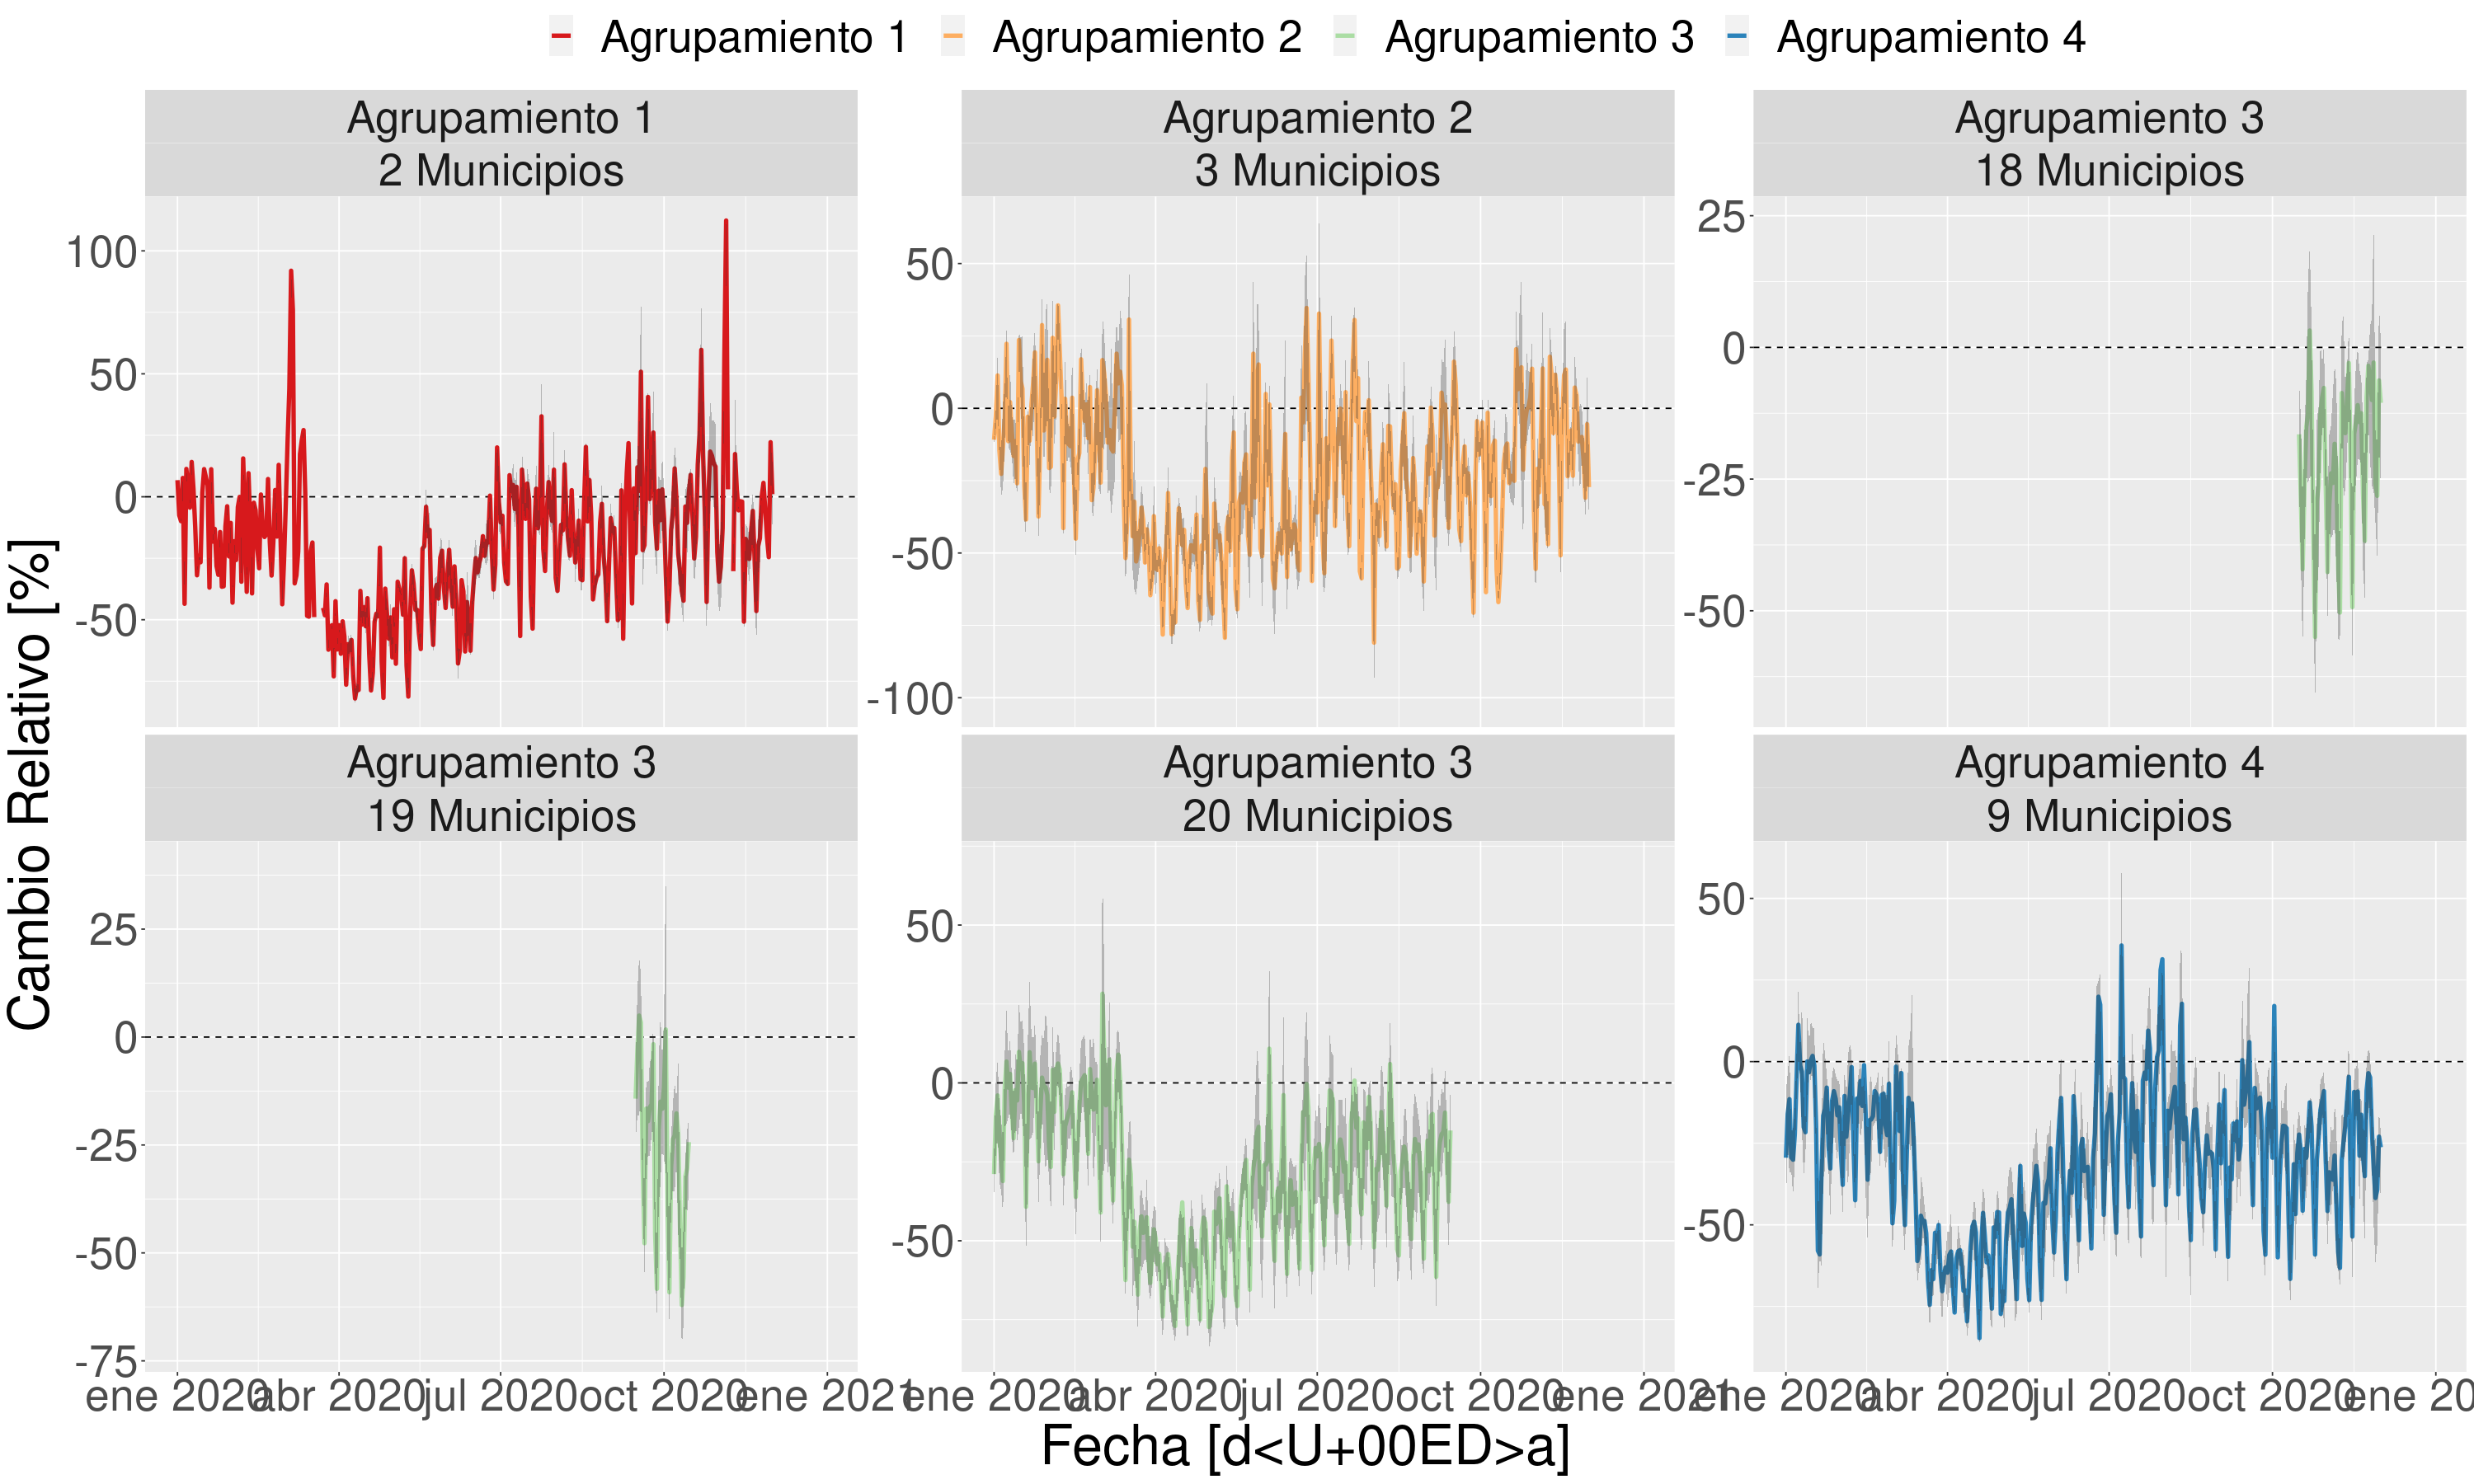

In [84]:
ggplot(data.df, aes(date)) +
            geom_hline(yintercept=0, 
                       linetype="dashed", 
                       color = "black") +
    geom_line(aes(y=mean, color=group), size=1.5) +
    geom_ribbon(aes(ymin=qnt.25,ymax=qnt.75),
                alpha=0.3) +
            theme(legend.position="top",
                  text = element_text(size=40),
                 ) +
            scale_x_date(name="Fecha [día]") +
            scale_color_brewer(name="", palette="Spectral",
                               labels = c("1" = "Agrupamiento 1", 
                                          "2" = "Agrupamiento 2", 
                                          "3" = "Agrupamiento 3", 
                                          "4" = "Agrupamiento 4")) +
            scale_y_continuous(name="Cambio Relativo [%]") +
    facet_wrap(~group+count, scale="free_y", 
               labeller = labeller(group=c("1" = paste("Agrupamiento 1"), 
                                           "2" = paste("Agrupamiento 2"), 
                                           "3" = paste("Agrupamiento 3"), 
                                           "4" = paste("Agrupamiento 4")),
                                   count=c("2" = "2 Municipios",
                                           "3" = "3 Municipios",
                                           "20" = "20 Municipios",
                                           "9" = "9 Municipios",
                                           "2" = "2 Municipios",
                                           "18" = "18 Municipios",
                                           "19" = "19 Municipios"
                                           )))